In [1]:
from all_function import *
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
"""
requirement
1. input data (write new)
2. fitness function (write new)
3. selection (have)
4. crossover (have)
5. mutation (have)
"""

In [6]:
def cost_function(predictions, targets):
    squared_errors = (predictions - targets) ** 2
    mse = np.mean(squared_errors)
    return mse

In [7]:
input = [-2, -1, 0, 1, 2]
output = [16, 4, 0, 2, 12]

In [8]:
cost_function(np.array(input), np.array(output))

90.0

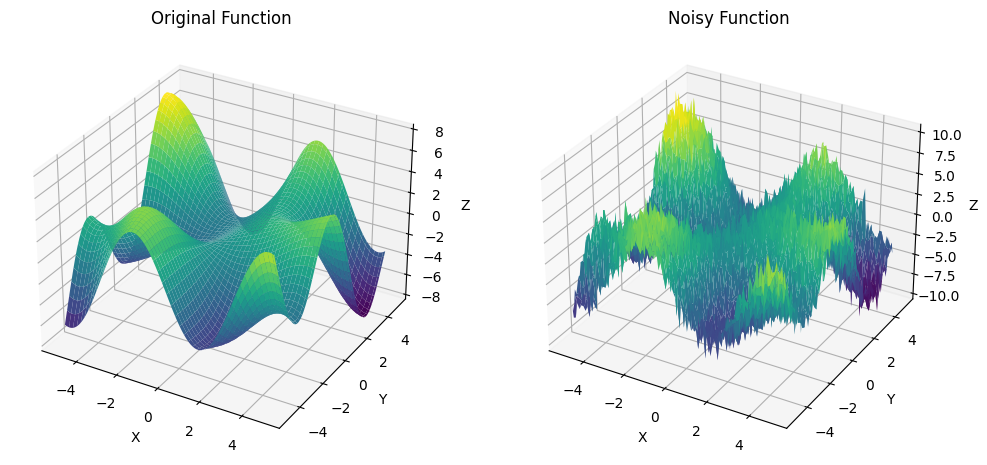

In [7]:
# Define the function
def f(x, y):
    return x**2 + y**2 + np.sin(x) + np.cos(y)

def rosenbrock(x, y, a=1, b=100):
    return (a - x) ** 2 + b * (y - x ** 2) ** 2

def alpine(x, y):
    return np.abs(x * np.sin(x) + 0.1 * x) + np.abs(y * np.sin(y) + 0.1 * y)

def rastrigin(x, y):
    A = 10
    return A * 2 + (x**2 - A * np.cos(2 * np.pi * x)) + (y**2 - A * np.cos(2 * np.pi * y))

def f_2(x, y):
    return y*np.sin(x) + x*np.cos(y)

# Generate data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)

# Z = f(X, Y)
# Z = rosenbrock(X, Y)
# Z = alpine(X, Y)
# Z = rastrigin(X, Y)
Z = f_2(X, Y)

# Generate random Gaussian noise with increased magnitude
mean = 0
std_dev = 1.0  # Adjust the standard deviation for increased noise
noise = np.random.normal(mean, std_dev, Z.shape)

# Add noise to the function values
Z_noisy = Z + noise

# Create the 3D plot
fig, ax = plt.subplots(1, 2, figsize=(12, 6), subplot_kw={'projection': '3d'})

# Plot the surface with noise
ax[0].plot_surface(X, Y, Z, cmap='viridis')
ax[1].plot_surface(X, Y, Z_noisy, cmap='viridis')

# Add labels and title
ax[0].set_title('Original Function')
ax[1].set_title('Noisy Function')
ax[0].set_xlabel('X')
ax[1].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[1].set_ylabel('Y')
ax[0].set_zlabel('Z')
ax[1].set_zlabel('Z')

# Show the plot
plt.show()

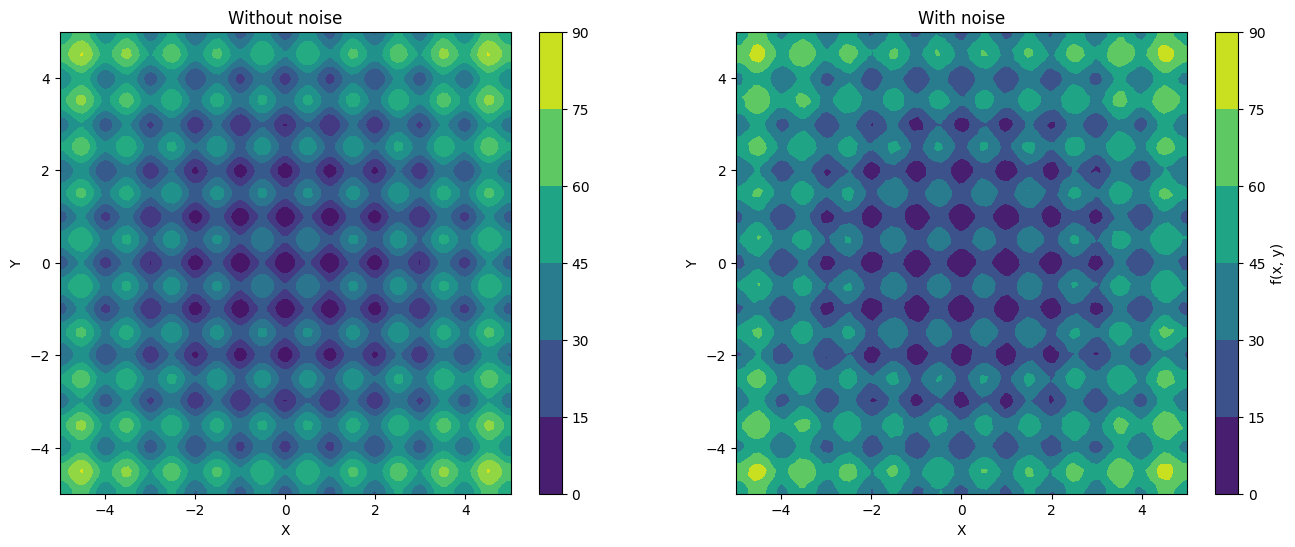

In [10]:
# Create the 2D filled contour plot
fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot the filled contours with noise
contour = ax[0].contourf(X, Y, Z, cmap='viridis')
contour = ax[1].contourf(X, Y, Z_noisy, cmap='viridis')

# Add labels and title
ax[0].set_xlabel('X')
ax[0].set_ylabel('Y')
ax[0].set_title('Without noise')
ax[1].set_xlabel('X')
ax[1].set_ylabel('Y')
ax[1].set_title('With noise')

# Add a colorbar for each plot
cbar = fig.colorbar(contour, ax=ax[0])
cbar = fig.colorbar(contour, ax=ax[1])
cbar.set_label('f(x, y)')
plt.show()


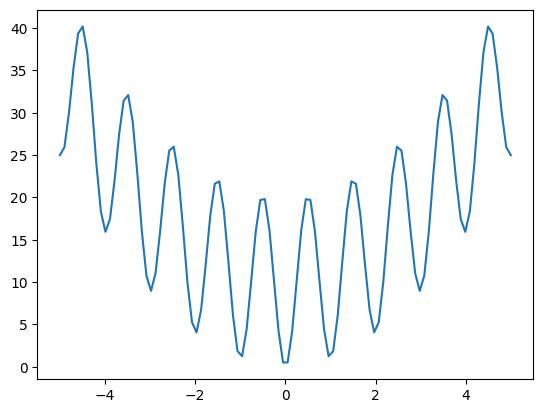

In [3]:
def rastrigin(x):
    A = 10
    n = len(x)
    return A * n + np.sum(x**2 - A * np.cos(2 * np.pi * x))

plt.plot(np.linspace(-5, 5, 100), [rastrigin(np.array([x])) for x in np.linspace(-5, 5, 100)])

In [4]:
num_generations = 100
population_size = 100
chromosome_length = 10
parent_size = 50

def calculate_cost(population):
    fitness = []
    for individual in population:
        fitness_value = rastrigin(individual)
        fitness.append(fitness_value)

    cost = 1/np.array(fitness)
    return cost


population = create_population(population_size, chromosome_length)
for i in range(num_generations):
    cost = calculate_cost(population)
    cost = cost / np.sum(cost)

    parent = roulette_wheel_selection(population, cost, parent_size)
    print(f'parent {parent}')
    print(len(parent))

    crossover_population = crossover(parent, cross=0.3, population_size=population_size)
    
    mutation_population = mutate(crossover_population, mutation_rate=0.1)
    population = mutation_population

best_individual = population[np.argmin(calculate_cost(population))]
print(best_individual)
print(rastrigin(best_individual))

    

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

Best chromosome [ 0.4443241   4.87461656  3.00265552  4.13886622 -1.95436685  2.40337068
 -3.98695012  0.25170289  2.90569446 -2.14805643]
Best cost [98.49266857431768, 126.94168135180848, 133.56060838117352, 127.25291548663226, 134.06632640566121, 144.29350400693943, 127.73057223950158, 150.44570994946588, 146.24162786281516, 142.2802470779305, 159.38999410306008, 145.33374481687554, 140.53109260484499, 143.88089587308858, 131.24392789717461, 139.58872622154706, 147.0656712000305, 144.41316842159742, 161.27642566701283, 168.59606289874603, 136.54361519156078, 165.0404588380644, 156.6879676157593, 153.76789793386257, 149.70879092123533, 131.75487362355597, 145.86805218307845, 150.48337772090275, 161.09483671687627, 118.66504496836936, 110.99984955148668, 110.99984955148668, 118.6573351469236, 157.2889704787052, 167.35159316652727, 138.70069812024775, 131.79826304255366, 140.7117025991882, 128.43843929786448, 132.283037512538, 135.0561776103646, 118.5738445334563, 152.40710196010164, 16

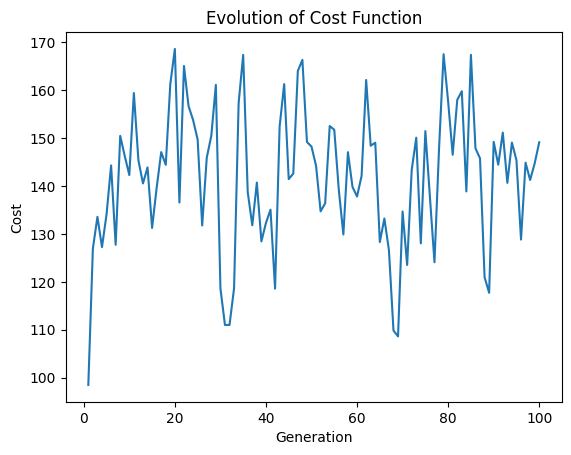

In [6]:
def rastrigin_function(x):
    n = len(x)
    A = 10
    return A * n + np.sum(np.square(x) - A * np.cos(2 * np.pi * x))

def initialize_population(population_size, chromosome_length, variable_range):
    population = []
    for _ in range(population_size):
        chromosome = np.random.uniform(variable_range[0], variable_range[1], size=chromosome_length)
        population.append(chromosome)
    return population

def calculate_cost(chromosome):
    return rastrigin_function(chromosome)

def calculate_total_cost(population):
    total_cost = 0
    for chromosome in population:
        total_cost += calculate_cost(chromosome)
    return total_cost

def roulette_wheel_selection(population, total_cost):
    probabilities = [calculate_cost(chromosome) / total_cost for chromosome in population]
    cumulative_probabilities = np.cumsum(probabilities)
    random_value = np.random.random()
    for i, cumulative_prob in enumerate(cumulative_probabilities):
        if random_value <= cumulative_prob:
            return population[i]

def crossover(parent1, parent2, crossover_rate):
    if np.random.random() < crossover_rate:
        crossover_point = np.random.randint(1, len(parent1) - 1)
        child1 = np.concatenate((parent1[:crossover_point], parent2[crossover_point:]))
        child2 = np.concatenate((parent2[:crossover_point], parent1[crossover_point:]))
        return child1, child2
    else:
        return parent1, parent2

def mutate(chromosome, mutation_rate, variable_range):
    mutated_chromosome = chromosome.copy()
    for i in range(len(mutated_chromosome)):
        if np.random.random() < mutation_rate:
            mutated_chromosome[i] = np.random.uniform(variable_range[0], variable_range[1])
    return mutated_chromosome

def genetic_algorithm(population_size, chromosome_length, variable_range, generation_count, crossover_rate, mutation_rate):
    population = initialize_population(population_size, chromosome_length, variable_range)
    best_costs = []

    for _ in range(generation_count):
        total_cost = calculate_total_cost(population)
        new_population = []

        for _ in range(population_size // 2):
            parent1 = roulette_wheel_selection(population, total_cost)
            parent2 = roulette_wheel_selection(population, total_cost)

            child1, child2 = crossover(parent1, parent2, crossover_rate)

            child1 = mutate(child1, mutation_rate, variable_range)
            child2 = mutate(child2, mutation_rate, variable_range)

            new_population.append(child1)
            new_population.append(child2)

        population = new_population

        best_chromosome = min(population, key=calculate_cost)
        best_cost = calculate_cost(best_chromosome)
        best_costs.append(best_cost)

    return best_chromosome, best_costs

# Example usage
population_size = 100
chromosome_length = 10
variable_range = (-5.12, 5.12)
generation_count = 100
crossover_rate = 0.8
mutation_rate = 0.1

best_chromosome, best_costs = genetic_algorithm(population_size, chromosome_length, variable_range, generation_count, crossover_rate, mutation_rate)
print(f'Best chromosome {best_chromosome}')
print(f'Best cost {best_costs}')

# Plot the evolution of the cost function
generations = range(1, generation_count + 1)
plt.plot(generations, best_costs)
plt.xlabel('Generation')
plt.ylabel('Cost')
plt.title('Evolution of Cost Function')
plt.show()